In [1]:
!pip install ktrain
import ktrain
from ktrain import text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 47.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 653.6/653.6 kB 45.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 36.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.38.0-py3-none-any.whl size=25319964 sha256=26e4

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
trainSet = pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Train.csv')
testSet =  pd.read_csv('/kaggle/input/sentnob-sentiment-analysis-in-noisy-bangla-texts/SentNoB Dataset/Test.csv')

In [3]:
!pip install bnltk
!pip install bnlp-toolkit==4.0.0.dev4

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2959 sha256=dd312b4986ce9196ca01a8d8543ddd008f4a51d9b4bc4182d4da6a2bc75ad3a3
  Stored in directory: /root/.cache/pip/wheels/5b/f6/92/0173054cc528db7ffe7b0c7652a96c3102aab156a6da960387
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 38.4 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=89c38fdd0a4bf345c571a6ab57bf0d0313123b883597aeccee6e0a09c64d9434
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.8.0
    Uninstalling emoji-2.8.0:


In [4]:
#Tokenizer
from bnlp import NLTKTokenizer
bnltk = NLTKTokenizer()

#for Train Set
for i in range(0,trainSet.shape[0]):
    text = bnltk.word_tokenize(trainSet['Data'][i])
    trainSet['Data'][i] = text
#For Test Set   
for i in range(0,testSet.shape[0]):
    text = bnltk.word_tokenize(testSet['Data'][i])
    testSet['Data'][i] = text

In [5]:
trainSet.head()

,Data,Label
0,"[মুগ্ধ, হয়ে, গেলাম, মামু., আর, তোমায়, কি, কমু....",1
1,"[এই, কুত্তার, বাচ্চাদের, জন্য, দেশটা, আজ, এমন,...",2
2,"[ভাই, আপনার, কথাই, যাদু, রয়েছে]",1
3,"[উওরটা, আমার, অনেক, ভাল, লেগেছে]",1
4,"[আমার, নিজের, গাড়ী, নিয়ে, কি, সাজেক, যেতে, পা...",0


In [6]:
!pip install BnLemma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 3.2 MB/s eta 0:00:00


In [7]:
testSet.head()

,Data,Label
0,"[স্বাস্থ্যবান, হতে, চাই, ,, আমি, বয়সের, তুলনায়...",0
1,"[ভাইয়া, নতুন, ভিডিও, আসে, না, কেন]",0
2,"[সৌরভ, গাঙ্গুলী, ছাড়া, দাদাগিরি, কখনো, জমে, উঠ...",0
3,"[ক্রিকেট, কে, বাচাতে, হলে, পাপকে, অতিশিগ্রিই, ...",2
4,"[আমিতো, সেই, ঝালপ্রিয়ো, মানুষ]",1


In [8]:
from bnlp import BengaliCorpus as corpus

# print(corpus.stopwords)
# print(corpus.punctuations)
# print(corpus.letters)
# print(corpus.digits)
# print(corpus.vowels)

stop_words = set(corpus.stopwords)


for i in range(0,trainSet.shape[0]):
    words = trainSet['Data'][i]
    trainSet['Data'][i] =  [word for word in words if word.lower() not in stop_words]
    

In [9]:
# stop_words = set(corpus.stopwords)


for i in range(0,testSet.shape[0]):
    words = testSet['Data'][i]
    testSet['Data'][i] =  [word for word in words if word.lower() not in stop_words]

In [10]:
trainSet

,Data,Label
0,"[মুগ্ধ, হয়ে, গেলাম, মামু., তোমায়, কমু., বলো, ত...",1
1,"[কুত্তার, বাচ্চাদের, দেশটা, অবস্তায়, তিনটা, পু...",2
2,"[ভাই, কথাই, যাদু, রয়েছে]",1
3,"[উওরটা, ভাল, লেগেছে]",1
4,"[গাড়ী, সাজেক, পারবো, ?, প্রাইভেট, কার, ?]",0
...,...,...
12570,"[বর্ডারে, লেট, হয়ে, যাওয়াতে, জিপে, যাই, বিকাল,...",1
12571,"[সোনার, বাংলাতে, রক্ষক, নামের, ভক্ষকের, জায়গা,...",2
12572,"[ওনারা, হাইজিনিক, সুন্দর, পরিবেশে, রান্না, বাস...",1
12573,"[বাংলাদেশ, পুলিশ, চাই, ধরনে, পুলিশ, দরকার]",2


In [11]:
trainSet['Data'] = trainSet['Data'].apply(' '.join)

In [12]:
testSet['Data'] = testSet['Data'].apply(' '.join)

In [13]:
from sklearn.model_selection import train_test_split
train = trainSet['Data'].values.tolist()
test = testSet['Data'].values.tolist()
train_cluster_id = trainSet['Label'].tolist()
test_cluster_id = testSet['Label'].tolist()

In [14]:
X_train = train
y_train = train_cluster_id
X_test = test
y_test = test_cluster_id

In [15]:
X_train

['মুগ্ধ হয়ে গেলাম মামু. তোমায় কমু. বলো তোমায় কোথায় পামু. সাথে যাবু. গান কমু গলি ঘুরমু.',
 'কুত্তার বাচ্চাদের দেশটা অবস্তায় তিনটা পুলিশ তরে মেরে পেলা দরকার',
 'ভাই কথাই যাদু রয়েছে',
 'উওরটা ভাল লেগেছে',
 'গাড়ী সাজেক পারবো ? প্রাইভেট কার ?',
 ': পরীক্ষার রেজাল্টের সময় , ব্যানিজ্যিক প্রচার',
 'বিশ্বনন্দিত বিশ্ব জয় ইসলামের পাখিদের কোরআনের পাখিদের খবর আরিফ অব্যয় বোদার বয় সিঙ্গেল বয় জাতি হিসেবে বাঙালি বর্তমানে মুরুক্ষ তারই প্রমাণ ঝাড়ু মার তোর কপালে',
 'সাপ্তাহিক মুসুল্লিদের কথাটাও ধরলে ভাই , চোখ খুলে দিছো',
 'ভেবেছিলাম গালিগালাজ সেরা ছেলে ? গালিবয়',
 'রেপারই হও , ডাক্তার হওয়ার দরকার',
 'লেসবো মেয়েটার ফ্রেন্ড টা কিউট',
 'আচ্ছা চারপাশে অন্ধকার ? লাইট টা আপনাদের টেবিলে পড়ছে',
 'আল্লাহ আপনাকে হায়াত দারাজ করুন মাঝে সুস্থ বেঁচে থাকার তৌফিক দান করুক',
 'ভাই এতো সুন্দর ভিডিও বানান সাবস্ক্রাইবার বাড়ে কেনো ?',
 'সাধারন মানুষ অন্যাই । রাজনীতি ব্যাক্তি পুলিশ । এক্তাই প্রশ্ন সাহস দিছে',
 'ভাই দয়াকরে খাবার নষ্ট করবেন্না',
 'এইসব ফকির ফাকরা রেপার হইবো কন্ঠ শুনে ডেন্ডি খায় বাল পাকনা পোলা ক্লাস ফাইভ স

In [16]:
import ktrain
from ktrain import text
MODEL_NAME = 'xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

In [17]:

y_train = [str(x) for x in train_cluster_id]
y_test = [str(x) for x in test_cluster_id]


In [18]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 11
	95percentile : 25
	99percentile : 33


Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 11
	95percentile : 25
	99percentile : 31


In [19]:
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=10)
history = learner.fit_onecycle(2e-5, 10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
1258/1258 [==============================] - 963s 745ms/step - loss: 1.0246 - accuracy: 0.4737 - val_loss: 0.8615 - val_accuracy: 0.6110
Epoch 2/10
1258/1258 [==============================] - 932s 741ms/step - loss: 0.8630 - accuracy: 0.6115 - val_loss: 0.7920 - val_accuracy: 0.6602
Epoch 3/10
1258/1258 [==============================] - 932s 741ms/step - loss: 0.7875 - accuracy: 0.6503 - val_loss: 0.7685 - val_accuracy: 0.6614
Epoch 4/10
1258/1258 [==============================] - 932s 741ms/step - loss: 0.7144 - accuracy: 0.6875 - val_loss: 0.7659 - val_accuracy: 0.6892
Epoch 5/10
1258/1258 [==============================] - 932s 741ms/step - loss: 0.6493 - accuracy: 0.7209 - val_loss: 0.7781 - val_accuracy: 0.6923
Epoch 6/10
1258/1258 [==============================] - 932s 741ms/step - loss: 0.5618 - accuracy: 0.7641 - val_loss: 0.7756 - val_accuracy: 0.7049
Epoch 7/10
1258/1258 [===========================

In [20]:
learner.validate(class_names=t.get_classes()) 

50/50 [==============================] - 10s 131ms/step
              precision    recall  f1-score   support

           0       0.50      0.49      0.50       361
           1       0.76      0.79      0.77       654
           2       0.78      0.75      0.77       571

    accuracy                           0.71      1586
   macro avg       0.68      0.68      0.68      1586
weighted avg       0.71      0.71      0.71      1586



array([[178, 103,  80],
       [ 98, 515,  41],
       [ 78,  63, 430]])

In [21]:
def PlotGraph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'g', label='Training acc')
    plt.plot(x, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'g', label='Training loss')
    plt.plot(x, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend() 

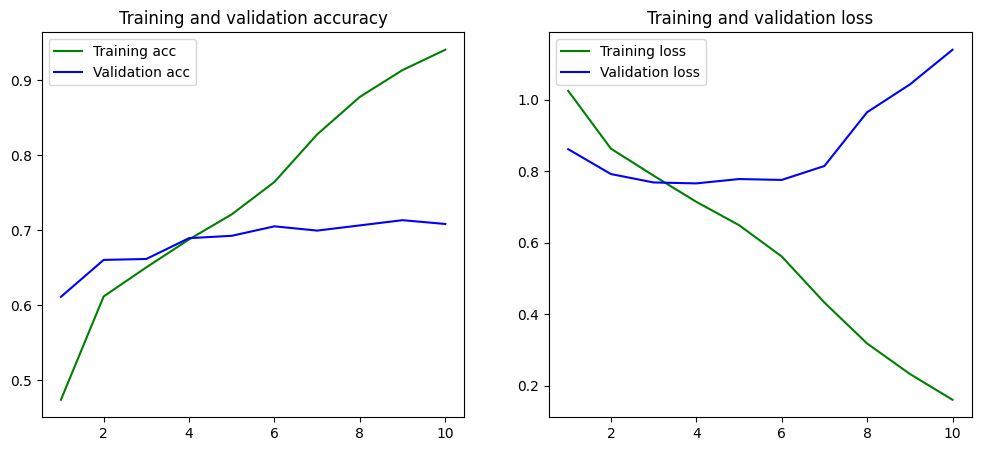

In [22]:
PlotGraph(history)